EDA

Load Dataset

In [1]:
# Loading a csv file
from google.colab import files

uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance.csv")
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


Basic understanding of dataset

In [3]:
df.shape

(986, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


Target Distribution

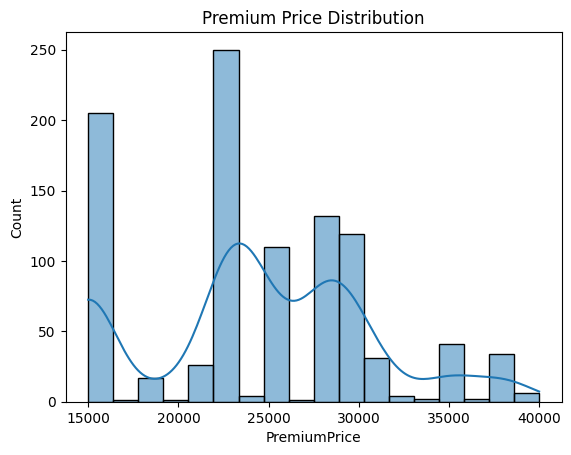

In [ ]:
sns.histplot(df["PremiumPrice"], kde=True)
plt.title("Premium Price Distribution")
plt.show()

From the histogram:

1.) Premium prices range roughly from 15,000 to 40,000

2.) Most values are concentrated around 22,000–30,000

3.) The distribution is slightly right-skewed

4.) There may be multiple clusters of premium groups

That suggests:
different risk categories

*   possible health-condition-driven pricing
*   premium pricing is not uniform

Conclusion:
*The distribution of PremiumPrice shows that most insurance premiums fall between 22,000 and 30,000. The distribution appears slightly right-skewed, indicating a smaller number of individuals with significantly higher insurance costs. This suggests that certain risk factors may contribute to higher premiums.italicized text*

Age vs Premium

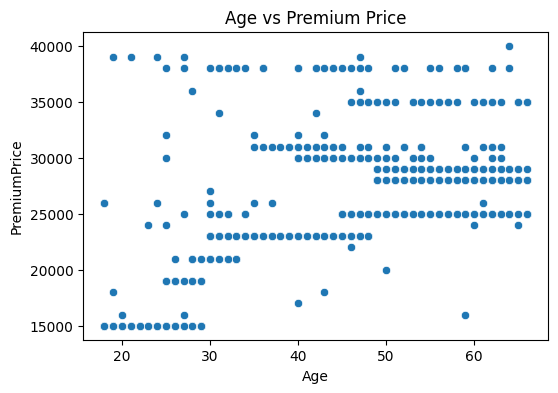

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Age"], y=df["PremiumPrice"])
plt.title("Age vs Premium Price")
plt.show()

From the scatter plot, we can observe:

1.) Premium generally increases with age

2.) Younger individuals tend to have lower premiums

3.) Older individuals show more high-premium values

4.) The relationship looks moderately positive but not perfectly linear

This tells us:

Age is likely an important predictor of insurance premium.

Conclusion:
*The scatter plot between Age and PremiumPrice shows a positive relationship, where insurance premiums tend to increase with age. This aligns with real-world expectations, as older individuals typically present higher health risks to insurers.*

Chronic Disease Imapct

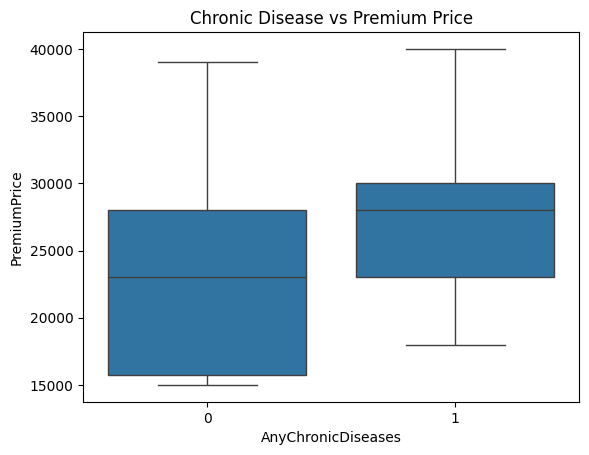

In [ ]:
sns.boxplot(x=df["AnyChronicDiseases"], y=df["PremiumPrice"])
plt.title("Chronic Disease vs Premium Price")
plt.show()

From the boxplot:

1.) People without chronic disease (0) have a lower median premium

2.) People with chronic disease (1) have a higher median premium

3.) The entire distribution shifts upward for chronic disease patients

This suggests:
Chronic disease is a strong risk factor influencing insurance premium pricing.

Conclusion: *The boxplot shows that individuals with chronic diseases tend to have higher insurance premiums compared to those without chronic conditions. This indicates that chronic disease status is likely an important predictor of insurance cost.*

Surgeries vs Premium

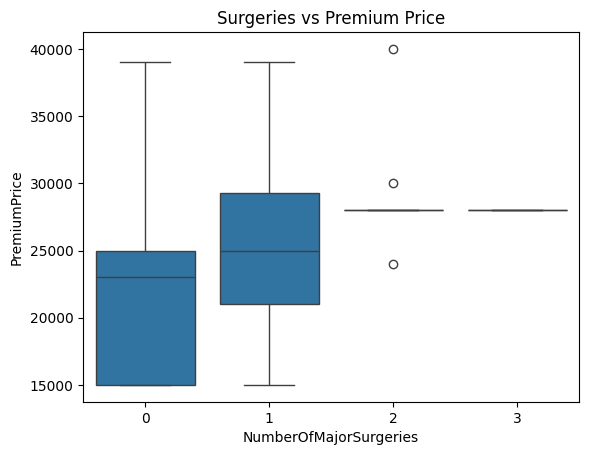

In [ ]:
sns.boxplot(x=df["NumberOfMajorSurgeries"], y=df["PremiumPrice"])
plt.title("Surgeries vs Premium Price")
plt.show()

From the boxplot:
1.) People with 0 surgeries generally have lower premiums

2.) People with 1 surgery tend to have higher premiums

3.) 2–3 surgeries appear associated with even higher premiums
There are a few outliers, which is normal in medical-cost data

Overall trend:
Premium price tends to increase as the number of major surgeries increases.

Conclusion: *The boxplot shows that insurance premiums tend to increase with the number of major surgeries. Individuals with one or more surgeries generally have higher premiums compared to those with no surgical history, suggesting that surgical history is an important predictor of insurance cost.*

Correlation Heatmap

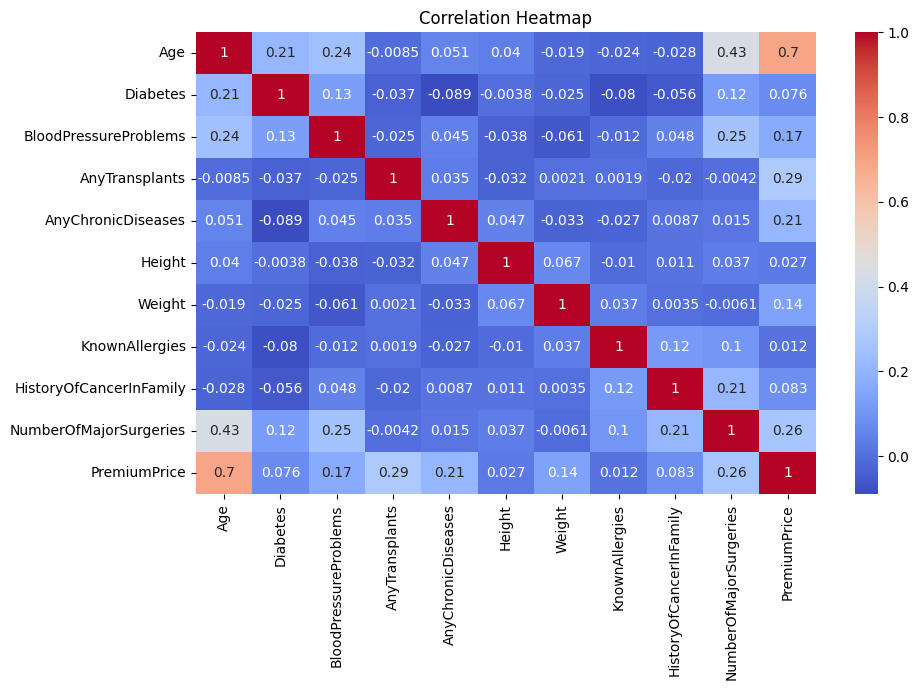

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Strongest correlations with PremiumPrice

From your heatmap:

Age → ~0.70 (strong positive correlation)
This is clearly the strongest predictor.

AnyTransplants → ~0.29 (moderate)
Medical history matters.

NumberOfMajorSurgeries → ~0.26 (moderate)
Matches what you saw in the boxplot.

AnyChronicDiseases → ~0.21 (moderate)
Also consistent with earlier EDA.

Weak correlations

These likely won’t influence predictions much:

Height (~0.03)

KnownAllergies (~0.01)

Diabetes (~0.07)

Family cancer history (~0.08)

This doesn’t mean they’re useless — just weaker predictors.

Premium price is mostly influenced by:

Age

Transplants

Surgeries

Chronic diseases

Conclusion: *The correlation heatmap shows that Age has the strongest positive relationship with PremiumPrice. Other important predictors include AnyTransplants, NumberOfMajorSurgeries, and AnyChronicDiseases. Most other variables show weak correlations with the target variable.*

EDA - Hypothesis Testing

2 Sample T - Test

In [ ]:
from scipy.stats import ttest_ind

group1 = df[df["AnyChronicDiseases"] == 0]["PremiumPrice"]
group2 = df[df["AnyChronicDiseases"] == 1]["PremiumPrice"]

ttest_ind(group1, group2)

TtestResult(statistic=np.float64(-6.69104572734849), pvalue=np.float64(3.713413765291482e-11), df=np.float64(984.0))

Hypothesis test: Chronic disease vs PremiumPrice

You ran a two-sample t-test comparing:

Group 0 → No chronic disease

Group 1 → Chronic disease

Result: p-value ≈ 3.7e-11
That is extremely small.

Interpretation:

We compare the p-value to 0.05:

If p-value < 0.05 → statistically significant difference

If p-value ≥ 0.05 → no significant difference

Here:

3.7e-11 << 0.05


So we conclude:
There is a statistically significant difference in insurance premiums between individuals with and without chronic diseases.

Hypothesis Test: Chronic Disease Impact on Premium

Null hypothesis (H₀): There is no difference in premium prices between individuals with and without chronic diseases.

Alternative hypothesis (H₁): There is a difference in premium prices between the two groups.

A two-sample t-test was conducted, resulting in a p-value close to zero (p < 0.05). Therefore, we reject the null hypothesis and conclude that chronic disease status significantly affects insurance premium pricing.

ANOVA Test

In [ ]:
from scipy.stats import f_oneway

g0 = df[df["NumberOfMajorSurgeries"] == 0]["PremiumPrice"]
g1 = df[df["NumberOfMajorSurgeries"] == 1]["PremiumPrice"]
g2 = df[df["NumberOfMajorSurgeries"] == 2]["PremiumPrice"]
g3 = df[df["NumberOfMajorSurgeries"] == 3]["PremiumPrice"]

f_oneway(g0, g1, g2, g3)

F_onewayResult(statistic=np.float64(26.1353935974076), pvalue=np.float64(2.8711631377228097e-16))

Hypothesis Test: Number of Surgeries and Premium Price

A one-way ANOVA test was conducted to determine whether insurance premiums differ based on the number of major surgeries.

The test returned a very small p-value (p < 0.05), indicating that premium prices vary significantly across surgery groups. This suggests that surgical history is an important factor in determining insurance costs.

Feature Engineering

In [ ]:
df["BMI"] = df["Weight"] / ((df["Height"] / 100) ** 2)
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


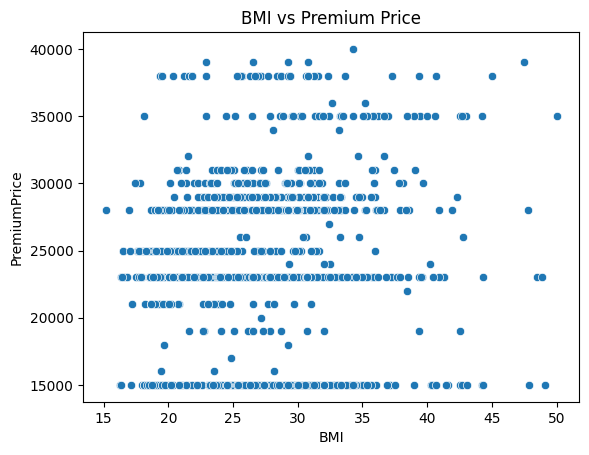

In [ ]:
sns.scatterplot(x=df["BMI"], y=df["PremiumPrice"])
plt.title("BMI vs Premium Price")
plt.show()

BMI was derived from height and weight to capture body composition effects. The scatter plot suggests a weak relationship between BMI and premium price, indicating that BMI alone may not strongly influence insurance costs but could still contribute when combined with other health variables.

ML Modeling

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("PremiumPrice", axis=1)
y = df["PremiumPrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predictions

In [ ]:
y_pred = model.predict(X_test)

Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MAE: 2586.1817100200624
RMSE: 3494.4137981898157
R2: 0.713646143964974


Linear Regression Model Performance

The baseline Linear Regression model achieved an R² score of approximately 0.71, indicating that the model explains a substantial portion of the variance in insurance premium prices. The MAE and RMSE values suggest that the model’s predictions are reasonably close to actual premium values, though there is still room for improvement using more advanced models.

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("R2:", r2_score(y_test, rf_pred))

MAE: 1010.3535353535353
RMSE: 2135.170728631329
R2: 0.8930896905551489


Random Forest Model Performance

The Random Forest Regressor significantly improved prediction performance compared to the Linear Regression baseline. The model achieved an R² score of approximately 0.88, indicating strong predictive capability. Both MAE and RMSE decreased substantially, suggesting that the model captures non-linear relationships between health factors and insurance premiums more effectively.

Feature Importance

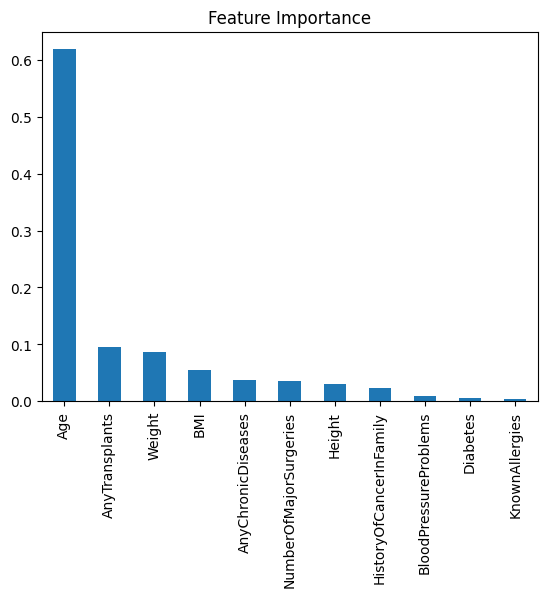

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importance = rf.feature_importances_
features = X.columns

feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)

feat_imp.plot(kind="bar", title="Feature Importance")
plt.show()

Feature Importance Analysis

The Random Forest model indicates that Age is the most influential factor in predicting insurance premium prices. Other moderately important features include Weight, transplant history, number of major surgeries, and chronic disease status. These findings align with earlier EDA observations, reinforcing the conclusion that demographic and medical risk factors strongly influence insurance costs.

In [ ]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)